# Lista de Exercícios 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parte 1 - Exercícios conceituais

### 1. Explique com suas palavras o que é um neurônio artificial e o seu funcionamento traçando uma analogia com o neurônio biológico.

O neurônio artificial é uma unidade simples de processamento, capaz de fazer um cálculo matemático com base em várias entradas e gerar uma saída, a qual pode ser conectada à entrada de outros neurônios artificiais. A conjunção de várias dessas unidades de processamento na forma de rede possibilita a execução de cálculos mais complexos.
Toda essa ideia foi inspirada no funcionamento do neurônio biológico. Esse também pode ser visto como uma unidade simples de processamento, o qual recebe múltiplos sinais eléstricos e gera uma saída, a qual é ligada a outros neurônios. Apesar de ser uma unidade tão simples, a grande quantidade existente no cérebro é o que gera toda sua capacidade.

### 2. O que são e para que servem os notebooks de programação?

Notebooks são ferramentas de programação que permite:
1) Geração de conteúdo através de texto e código (em diversas linguages através dos kernels).
2) Executar código de maneira interativa, visualizando diretamente o resultado, seja ele uma simples resposta da chamada de um método até a exibição de gráficos e figuras.
Eles são comumente utilizados para prototipação, visto que os resultados podem ser visualizados imediamente, permitindo fácil alteração das células de código e sua reexecução. Também é utilizado para facilitar a reprodutibilidade de material científico, visto que determinado artigo feito em um Notebook já mostra o código utilizado e facilita que o leitor o execute novamente. Em alguns momentos, também é utilizado para ensino, visto que o aluno também pode acessar facilmente o código utilizado.

### 3. Explique para que serve o Bias.

O Bias serve para representar um viés do problema. Matematicamente, ele permite ajustar a reta ou curva gerada pela função matemática de saída do neurônio. Sem ela, um classificador, por exemplo, só conseguiria gerar retas saindo do ponto zero.
Para exemplificar, os gráficos abaixo mostram equações com e sem um Bias.

In [32]:
def plot_linear_function(func, y_lim):
    x = np.array([0, 5])
    y = func(x)
    plt.grid()
    plt.margins(x=0)
    plt.ylim(y_lim)
    plt.plot(x, y)
    plt.show()

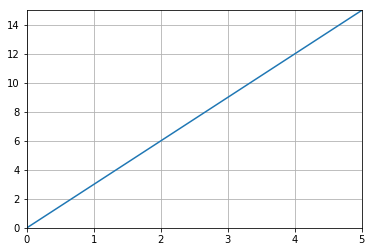

In [33]:
# 3x
plot_linear_function(lambda x: 3*x, [0, 15])

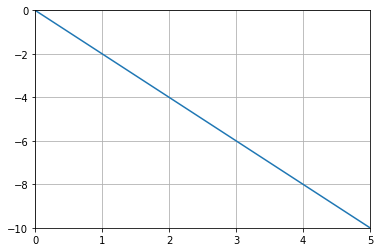

In [35]:
# -2x
plot_linear_function(lambda x: -2*x, [-10, 0])

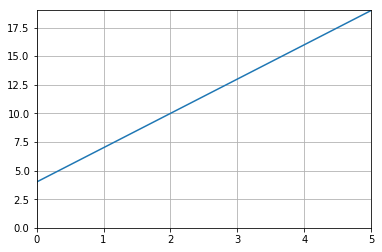

In [39]:
# 3x + 4
plot_linear_function(lambda x: 3*x + 4, [0, 19])

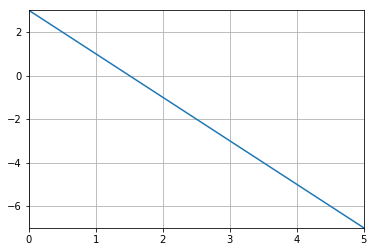

In [40]:
# -2x + 3
plot_linear_function(lambda x: -2*x + 3, [-7, 3])

Como pode-se notar pelos gráficos, sem o Bias (o termo que não é multiplicado por uma das entradas), todas as retas têm a origem no zero. Com retas assim, não seria possível separar nem mesmo problemas linearmente separáveis.

### 4. Explique matematicamente em um plano o efeito do uso do Bias na definição de um hiperplano para um problema hipotético.

O bias tem o efeito de transladar um hiperplano, tornando possível que esse separe elementos em duas categorias. Para exemplificar, o gráfico a seguir mostra elementos de duas categorias diferentes:

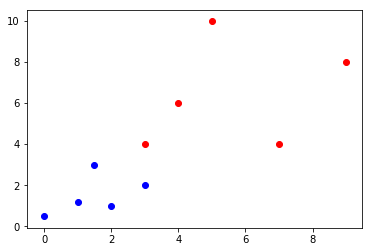

In [41]:
plt.scatter([3, 4, 7, 5, 9], [4, 6, 4, 10, 8], color='red')
plt.scatter([1, 0, 2, 1.5, 3], [1.2, 0.5, 1, 3, 2], color='blue')
plt.show()

Existem diversos hiperplanos capazes de separar essas duas categorias, mas todos eles necessitam do bias, como pode ser visto a seguir:

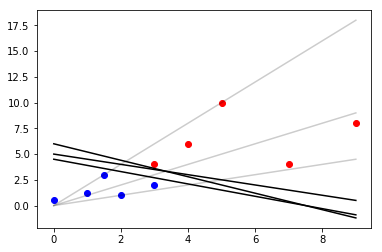

In [55]:
def plot_hyperplane(func, alpha=1):
    x = np.array([0, 9])
    y = func(x)
    plt.plot(x, y, alpha=alpha, color='black')

plt.scatter([3, 4, 7, 5, 9], [4, 6, 4, 10, 8], color='red')
plt.scatter([1, 0, 2, 1.5, 3], [1.2, 0.5, 1, 3, 2], color='blue')
plot_hyperplane(lambda x: 2*x, 0.2)
plot_hyperplane(lambda x: 0.5*x, 0.2)
plot_hyperplane(lambda x: x, 0.2)
plot_hyperplane(lambda x: -0.5*x+5)
plot_hyperplane(lambda x: -0.6*x+4.5)
plot_hyperplane(lambda x: -0.8*x+6)
plt.show()

### 5. Explique conceitualmente o funcionamento do tensorflow estabelecendo uma relação entre nós e arestas de um grafo.

O Tensorflow permite a configuração prévia de uma série de operações matemáticas a serem executadas no futuro. Para isso, ele representa essas operações em uma estrutura de DAG (Directed acyclic graph). Ou seja, cada operação é representado por um nó e suas dependências são representadas por arestas que conectam esses nós. Se uma operação matemática depende do resultado de duas outras, essas serão executadas primeiro e seus resultados serão utilizados na operação seguinte.
Esse conceito pode ser utilizado tanto por operações mais simples, como uma equação, como também operações muito mais complexas, as quais são abstrações de operações mais simples.

### 6. Quais as principais diferenças no fluxo de execução no tensorflow em relação a estruturas de dados convencionais?

Em estruturas convencionais, a execução acontece no momento em que cada linha de código é executada. Assim, é comum armazenar os valores em variáveis e utilizá-las em outras computações. No Tensorflow, existem dois momentos: o momento em que o grafo de execução é configurado e o momento em que uma sessão é aberta e esse grafo é executado pelo Tensorflow. A vantagem dessa abordagem é que o Tensorflow pode preparar um plano de como irá executar esse grafo de operações, podendo inclusive distribuí-las em múltiplos núcleos de processamento e até mesmo executá-las em GPU(s) com instruções de CUDA. Sem o uso do Tensorflow, teríamos que implementar manualmente essa distribuição, o que é bem complexo, especialmente se for necessário utilizar código em CUDA.
Além disso, é possível armazenar esse grafo e executá-lo depois. Também é possível criar placeholder onde serão inseridos os dados de entrada durante a execução.

### 7. Descreva o objetivo do uso da função de ativação de um neurônio.

O objetivo da função de ativação de um neurônio é adicionar não linearidade em sua resposta. Do contrário, mesmo com redes de múltiplas camadas, só seria possível criar retas através da somatória das entradas.

### 8. Qual o objetivo do uso de pesos nos neurônios artificiais? Dica: Faça uma analogia entre sistemas biológicos e artificiais.

O objetivo é ponderar a importância de cada entrada e indicar se ela terá um efeito positivo ou negativo na resposta final. Em sistemas biológicos, é como nosso cérebro consegue se concentrar em partes importantes da informação para chegar a um entendimento. O sistema que processa as imagens capturadas pelos olhos, por exemplo, consegue ponderar as partes mais importantes (como bordas, cores, etc.), criando abstrações para os próximos neurônios. Em sistemas artificiais, é como se decide se determinada característica é mais importante que outra na classificação ou regressão, por exemplo.

### 9. Um neurônio artificial que usa uma função de ativação não-linear é capaz de tratar problemas não-lineares? Justifique sua resposta.

Sim. Se duas classes forem separáveis por **uma** curva, ao invés de uma reta, é possível que a separação seja feita por um único neurônio com a função de ativação correta. Entretanto, é comum a combinação de múltiplos neurônios em rede para que vários hiperplanos possam ser gerados, tornando mais precisa a classificação.

### 10. Se um neurônio artificial do tipo perceptron for inicializado com todos os pesos iguais a zero ele irá convergir para uma solução aceitável no problema?

Sim. Dado o algoritmo de treinamento do Perceptron, ele conseguirá convergir em problemas linearmente separáveis. Isso porque ele utiliza um algoritmo simples que faz ajuste online dos pesos a cada erro, não fazendo uso de gradiente descendente ou técnicas do tipo.

### 11. Um neurônio artificial após o seu treinamento apresenta todos os pesos iguais. Como você interpretaria esse resultado?

Considerando que não houve algum erro no treinamento, significa que ele identificou que todas as features têm igual relevância, todas contribuindo no mesmo sentido (positivo ou negativo) para a resposta final.

### 12. Em caso do NÃO-USO do bias em um neurônio artificial o resultado do treinamento será o mesmo?

Não. Em alguns casos, nem será possível chegar em uma solução aceitável.

### 13. Para que serve a taxa de aprendizado no processo de treinamento de um neurônio artificial?

Ela serve para calibrar a alteração de pesos em cada passo do treinamento. Uma taxa de aprendizado alta faz com que as alterações aconteçam mais rápido, mas pode fazer com que os pesos ultrapassem os valores corretos da solução. Em casos extremos, pode fazer com que a resposta piore a cada passo por passar direto da solução e se afastar muito. Enquanto isso, uma taxa de aprendizado baixa faz com que as alterações sejam muito lentas, necessitando uma quantidade maior de passos e/ou épocas. Além do tempo computacional extra, também pode fazer com que o algoritmo fique tenha dificuldades em sair de ótimos locais.

### 14. O que é e para que serve o gradiente?

#### a) Exemplifique conceitualmente. Dica: Exponha sua resposta para uma criança de 10 anos e verifique se ela entendeu.

O gradiente é como se fosse uma bússula que aponta para o ponto mais alto. Se estivéssemos em uma área de serra, ele sempre apontaria para uma direção de subida imediata. Porém, além de apontar, ele também mostra a intensidade dessa subida. Se estivermos diante de uma subida muito íngrime, ele aponta para ela com um valor alto. Se estivermos num lugar quase plano, seu valor é muito menor.
A utilidade é encontrar pontos mais altos ou mais baixos se seguirmos essa "bússola" no sentido em que ela aponta ou no sentido oposto.

#### b) Exemplifique matematicamente

O gradiente indica a variação imediata de valor de uma função de acordo com determinada variável de entrada. Dada uma função, sua derivada apontará para a direção de maior valor dessa função com determinada intensidade. Para isso, basta derivarmos a função em relação a cada uma de suas entradas, obtendo esses valores e utilizando-os como um vetor. Esse vetor terá direção e sentido apontando para o crescimento do valor dessa função. Dessa forma, pode-se utilizá-lo para buscar por valores máximos ou mínimos dessa função.

### 15. Sempre que a derivada de uma função é nula podemos afirmar que a função passa por um máximo ou mínimo?

Não exatamente. Se estiver em uma parte plana dessa função, o valor da derivada também será nula. Isso pode ser observado na segunda figura que demonstra um ponto de inflexão.

### 16. Dado a função y = f(x) = x^4 ∗ 3x^3 + 2 escolha um valor aleatório de x e mostre com um exemplo numérico como o cálculo da derivada leva ao ponto de mínimo da função com uma determinada taxa de aprendizado.

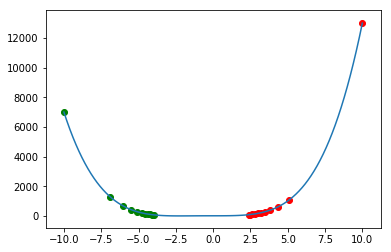

In [61]:
theta = 0.001

def func(x):
    return x**4 + 3*x**3 + 2

def derivative(x):
    return 4*x**3 + 9*x**2

x = np.linspace(-10, 10, 100)
plt.plot(x, func(x))

def search(initial_value, color):
    x_values = [initial_value]

    for i in range(10):
        xt = x_values[-1]
        xt1 = xt - theta * derivative(xt)
        x_values.append(xt1)

    plt.scatter(x_values, func(np.array(x_values)), color=color)
    
search(10, 'red')
search(-10, 'green')
plt.show()

### 17. Qual a diferença entre o algoritmo de treinamento do neurônio perceptron e o Adaline?

Primeiramente, o Perceptron utiliza o **step** como função de ativação, convertendo os valores para 0 ou 1. Dessa forma, não é possível verificar o erro verdadeiro do neurônio, mas sim se ele gerou a resposta final correta.
O treinamento do Perceptron simplesmente ajusta todos os pesos multiplicando a entrada pela subtração entre o valor esperado e o valor de saída. Dessa forma, ele tenta localizar os pesos "culpados" do erro e ajustá-los. Todo esse treinamento é feito online, ou seja, a cada passo do treinamento os pesos são ajustados.

Por outro lado, o Adaline utiliza uma função de ativação linear. Com isso, ela não verifica apenas se a resposta final está correta ou errada, mas também verifica o quanto ela se aproxima ou se afasta da resposta esperada.
O treinamento do Adaline é baseado no gradiente descendente e é executado em batch. A cada época de treinamento, todos os erros são calculados e obtém-se a média quadrática do erro. Por fim, utiliza-se do gradiente para minimizar esse erro quadrático, ajustando os pesos a cada época.

A grande diferença entre os dois é que, dado uma taxa de aprendizagem suficientemente pequena, o adaline garante que a melhor reta que separa duas classes será encontrada. Enquanto o Perceptron pode gerar infinitas retas, variando de acordo com os valores iniciais dos pesos.

### 18. Independente dos valores inicias assumidos para o vetor de pesos do Adaline, uma mesma configuração final para w (final) será sempre obtida após a sua convergência. Essa afirmação é falsa ou verdadeira? Justifique.

Como explicado na questão anterior, essa afirmação é verdadeira. Isso porque o Adaline minimiza os erros quadráticos, ao invés de apenas corrigir o resultado final, como o Perceptron.

### 19. Explique a figura abaixo. (PDF)

Essa figura representa um hiperplano de decisão que poderia ser utilizado por um classificador. Ela tém essa forma de acordo com os pesos adotados pelo Perceptron com o fim do treinamento.

## Parte 2 - Exercícios de Implementação

### 20. Considere o código do arquivo exercicio14.py. Construa um notebook e comente o que cada trecho de código indicado está realizando.

In [ ]:
# Importando as bibliotecas necessárias
# Numpy para processamento matemático de vetores e matrizes
# Tensorflow para processamento matemático de Grafos, geralmente utilizado em Deep Learning
import numpy as np
import tensorflow as tf

# Criação da sessão do Tensorflow
sess = tf.Session()

# Função criada para imprimir variáveis
# Abaixo, uma constante é criada no grafo
def print_tf(x):
    print("TIPO: \n %s" % (type(x)))
    print("Valor: \n %s" % (x))
hello = tf.constant("www.deeplearningbrasil.com.br")
print_tf(hello)

# Utiliza a sessão do Tensorflow para executar o único nó presente no grafo até o momento (a constante criada)
# Depois, o resultado é imprimido na tela utilizando a função criada anteriormente
hello_out = sess.run(hello)
print_tf(hello_out)

# Duas constantes são criadas e imprimidas
# Porém, por não terem sido executadas pelo tensorflow ainda, ainda não são consideradas float
a = tf.constant(1.5)
b = tf.constant(2.5)
print_tf(a)
print_tf(b)

# Os dois nós são executados separadamente, retornando o valor da constante (float)
# Então, o valor é imprimido
a_out = sess.run(a)
b_out = sess.run(b)
print_tf(a_out)
print_tf(b_out)

# Um novo nó é criado, representando a operação matemática entre a constante a e b
# Esse nó é imprimido na tela. Lembrando que ainda não é o valor da somatória
a_plus_b = tf.add(a, b)
print_tf(a_plus_b)

# A somatória é executada pelo Tensorflow e o valor é de 4 é imprimido na tela
a_plus_b_out = sess.run(a_plus_b)
print_tf(a_plus_b_out)

# Um novo nó representando a multiplicação da constante a e b é criado.
# Depois, ele é executado pelo tensorflow e o valor de 3,75 é imprimido
a_mul_b = tf.mul(a, b)
a_mul_b_out = sess.run(a_mul_b)
print_tf(a_mul_b_out)

# Cria um nó que representa uma variável que será inicializada futuramente.
# Essa variável receberá (quando for inicializada) uma matriz de dimensões 5x2 com valores aleatórios
# vindos de uma distribuição normal de desvio padrão de 0.1.
weight = tf.Variable(tf.random_normal([5, 2], stddev=0.1))
print_tf(weight)

# Variáveis devem ser inicializadas antes que seus nós possam rodar no Tensorflow
weight_out = sess.run(weight)
print_tf(weight_out)

# Cria um nó de inicialização de todas variáveis presentes no grafo e o executa
init = tf.initialize_all_variables()
sess.run(init)

# Executa o nó da variável e printa o resultado
weight_out = sess.run(weight)
print_tf(weight_out)
print ("INITIALIZING ALL VARIALBES")

# Cria um placeholder, o qual poderá receber um valor no momento em que for rodar a sessão através
# do feed_dict. Ele possuirá uma quantidade indefinida de linhas e 5 colunas.
x = tf.placeholder(tf.float32, [None, 5])
print_tf(x)

# Cria uma nó no grafo representando a multiplicação da matriz presente na variável weight e o placeholder
# a ser populado.
oper = tf.matmul(x, weight)
print_tf(oper)

# Cria uma matriz com números aleatórios de dimensão 1x5
# Executa o nó da multiplicação das matrizes, colocando a matriz recém criada no placeholder.
# Depois disso, o resultado é printado na tela
data = np.random.rand(1, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

# Executa a mesma operação, mas dessa vez com uma matriz de dimensão 2x5
data = np.random.rand(2, 5)
oper_out = sess.run(oper, feed_dict={x: data})
print_tf(oper_out)

### 21. Faça a implementação do algoritmo de treinamento do neurônio perceptron. Realize o treinamento do neurônio para a solução do problema do operador lógico OU partindo da inicialização do pesos abaixo:
#### w1: 0.3092
#### w2: 0.3129
#### bias: -0.8649

In [187]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 1])

In [307]:
class Perceptron:

    def __init__(self, initial_weights):
        self._weights = np.array(initial_weights)
        
    def _prepend_bias(self, X):
        return np.insert(np.atleast_2d(X), 0, values=1, axis=1)
    
    def predict(self, X):
        output = np.matmul(self._prepend_bias(X), self._weights)
        return (output >= 0).astype(int)
    
    def fit(self, X, y):
        n = X.shape[0]
        weights_history = [self._weights]
        errors_history = []
        for i in range (100):
            for x, d in zip(X, y):
                prediction = self.predict(x)
                error = d-prediction[0]
                delta = np.insert(x, 0, 1)*error
                self._weights = self._weights + delta
                weights_history.append(self._weights)
                errors_history.append(error)
                if len(errors_history) >= n and not np.any(errors_history[-n:]):
                    # Early stopping
                    return weights_history, errors_history
                
        return weights_history, errors_history

In [308]:
perceptron = Perceptron([-0.8649, 0.3092, 0.3129])

In [309]:
weights_history, errors_history = perceptron.fit(X, y)

In [310]:
perceptron.predict(X)

array([0, 1, 1, 1])

In [311]:
errors_history

[0, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0]

a) O treinamento convergiu depois de 8 passos.

In [312]:
def plot_or(weights):
    plt.grid()
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

    for w in weights:
        slope = -(w[0]/w[2])/(w[0]/w[1])  
        intercept = -w[0]/w[2]
        print("weights:", w, "Slope:", slope, "Intercept:", intercept)
        x = np.array([-0.1, 1.1])
        d = slope*x + intercept
        plt.plot(x, d)

    plt.show()

b) Gráfico a seguir.

weights: [-0.8649  0.3092  0.3129] Slope: -0.988175135826 Intercept: 2.76414189837
weights: [-0.8649  0.3092  0.3129] Slope: -0.988175135826 Intercept: 2.76414189837
weights: [ 0.1351  0.3092  1.3129] Slope: -0.235509178155 Intercept: -0.102901972732
weights: [ 0.1351  0.3092  1.3129] Slope: -0.235509178155 Intercept: -0.102901972732
weights: [ 0.1351  0.3092  1.3129] Slope: -0.235509178155 Intercept: -0.102901972732
weights: [-0.8649  0.3092  1.3129] Slope: -0.235509178155 Intercept: 0.65877066037
weights: [-0.8649  0.3092  1.3129] Slope: -0.235509178155 Intercept: 0.65877066037
weights: [ 0.1351  1.3092  1.3129] Slope: -0.997181811258 Intercept: -0.102901972732
weights: [ 0.1351  1.3092  1.3129] Slope: -0.997181811258 Intercept: -0.102901972732
weights: [-0.8649  1.3092  1.3129] Slope: -0.997181811258 Intercept: 0.65877066037
weights: [-0.8649  1.3092  1.3129] Slope: -0.997181811258 Intercept: 0.65877066037
weights: [-0.8649  1.3092  1.3129] Slope: -0.997181811258 Intercept: 0.658770

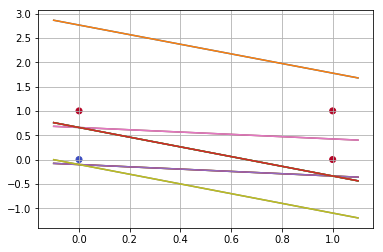

In [313]:
plot_or(weights_history)

c) w1 = 0.05, w2 = 0.7, bias = 1.2

In [314]:
perceptron = Perceptron([1.2, 0.05, 0.7])

In [315]:
weights_history, errors_history = perceptron.fit(X, y)

In [316]:
perceptron.predict(X)

array([0, 1, 1, 1])

In [317]:
errors_history

[-1, 0, 0, 0, -1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0]

Convergiu em 13 passos.

weights: [ 1.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -1.71428571429
weights: [ 0.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -0.285714285714
weights: [ 0.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -0.285714285714
weights: [ 0.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -0.285714285714
weights: [ 0.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -0.285714285714
weights: [-0.8   0.05  0.7 ] Slope: -0.0714285714286 Intercept: 1.14285714286
weights: [ 0.2   0.05  1.7 ] Slope: -0.0294117647059 Intercept: -0.117647058824
weights: [ 0.2   0.05  1.7 ] Slope: -0.0294117647059 Intercept: -0.117647058824
weights: [ 0.2   0.05  1.7 ] Slope: -0.0294117647059 Intercept: -0.117647058824
weights: [-0.8   0.05  1.7 ] Slope: -0.0294117647059 Intercept: 0.470588235294
weights: [-0.8   0.05  1.7 ] Slope: -0.0294117647059 Intercept: 0.470588235294
weights: [ 0.2   1.05  1.7 ] Slope: -0.617647058824 Intercept: -0.117647058824
weights: [ 0.2   1.05  1.7 ] Slope: -0.6176470

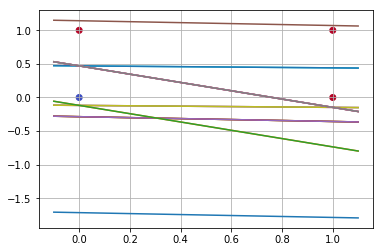

In [318]:
plot_or(weights_history)

### 22. Faça a implementação do algoritmo de treinamento do neurônio Adaline. Realize o treinamento do neurônio para a solução do problema do operador lógico OU partindo da inicialização do pesos abaixo:
#### w1: 0.3092
#### w2: 0.3129
#### bias: -0.8649

In [421]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([-1, 1, 1, 1])

In [457]:
class Adaline:

    def __init__(self, initial_weights, learning_rate):
        self._weights = np.array(initial_weights)
        self._learning_rate = learning_rate
        
    def _prepend_bias(self, X):
        return np.insert(np.atleast_2d(X), 0, values=1, axis=1)
    
    def _calculate_output(self, X):
        return np.matmul(self._prepend_bias(X), self._weights)
    
    def predict(self, X):
        return np.where(self._calculate_output(X) >= 0.0, 1, -1)
    
    def fit(self, X, y):
        weights_history = [self._weights]
        errors_history = []
        for i in range (50):
            output = self._calculate_output(X)
            errors = (y - output)
            delta = self._learning_rate * adaline._prepend_bias(X).T.dot(errors)
            self._weights = self._weights + delta
            weights_history.append(self._weights)
            errors_history.append((errors**2).sum() / 2.0)
                
        return weights_history, errors_history

In [458]:
adaline = Adaline([-0.8649, 0.3092, 0.3129], 0.1)

In [459]:
weights_history, errors_history = adaline.fit(X, y)

In [460]:
adaline.predict(X)

array([-1,  1,  1,  1])

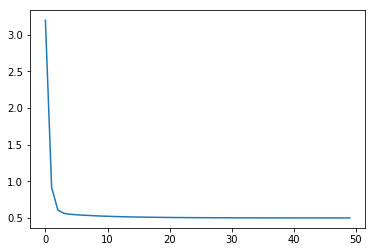

In [461]:
plt.plot(np.arange(0, len(errors_history)), errors_history)

d) Por volta de 3 épocas o resultado já estava bem próximo de convergir à melhor solução.

e) Segue o gráfico com os hiperplanos de separação das 20 épocas de treinamento.

weights: [-0.8649  0.3092  0.3129] Slope: -0.988175135826 Intercept: 2.76414189837
weights: [-0.44336  0.58905  0.59238] Slope: -0.994378608326 Intercept: 0.748438502313
weights: [-0.302302  0.700674  0.703671] Slope: -0.995740907327 Intercept: 0.429607018052
weights: [-0.2622502  0.7506325  0.7533298] Slope: -0.996419496481 Intercept: 0.348121367295
weights: [-0.25814258  0.77762306  0.78005063] Slope: -0.996887932774 Intercept: 0.330930544855
weights: [-0.26642029  0.7957219   0.79790671] Slope: -0.997261819005 Intercept: 0.333899040233
weights: [-0.27857789  0.81007091  0.81203724] Slope: -0.997578520285 Intercept: 0.343060492131
weights: [-0.29156837  0.82256858  0.82433828] Slope: -0.997853188945 Intercept: 0.353699898698
weights: [-0.30432239  0.83393471  0.83552744] Slope: -0.998093744617 Intercept: 0.364227884535
weights: [-0.31648586  0.8444595   0.84589296] Slope: -0.998305393376 Intercept: 0.374144105805
weights: [-0.32796201  0.85427548  0.85556559] Slope: -0.998492096638 I

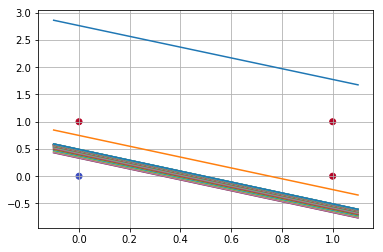

In [462]:
plot_or(weights_history)

f) w1 = 0.05, w2 = 0.7, bias = 1.2

In [463]:
adaline = Adaline([1.2, 0.05, 0.7], 0.1)

In [464]:
weights_history, errors_history = adaline.fit(X, y)

In [465]:
adaline.predict(X)

array([-1,  1,  1,  1])

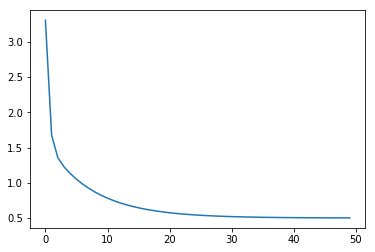

In [466]:
plt.plot(np.arange(0, len(errors_history)), errors_history)

Nesse caso, já demorou mais para convergir, levando ao menos 20 épocas.

weights: [ 1.2   0.05  0.7 ] Slope: -0.0714285714286 Intercept: -1.71428571429
weights: [ 0.77  -0.07   0.515] Slope: 0.135922330097 Intercept: -1.49514563107
weights: [ 0.573  -0.0615  0.465 ] Slope: 0.132258064516 Intercept: -1.23225806452
weights: [ 0.4631  -0.0103   0.46355] Slope: 0.0222198252616 Intercept: -0.999029230935
weights: [ 0.38721   0.052785  0.47925 ] Slope: -0.11014084507 Intercept: -0.807949921753
weights: [ 0.325919   0.116861   0.5006795] Slope: -0.233404802873 Intercept: -0.650953354391
weights: [ 0.2720433   0.17823705  0.5236737 ] Slope: -0.340358986903 Intercept: -0.519490094691
weights: [ 0.22284383  0.23581361  0.54670659] Slope: -0.431334855216 Intercept: -0.407611380653
weights: [ 0.17720226  0.28941146  0.56921515] Slope: -0.50843949429 Intercept: -0.311309804933
weights: [ 0.13459603  0.3391672   0.59099052] Slope: -0.573896181635 Intercept: -0.22774651537
weights: [ 0.09472607  0.3853155   0.61195649] Slope: -0.629645261408 Intercept: -0.154792171604
wei

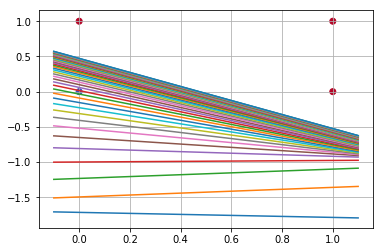

In [467]:
plot_or(weights_history)

### 23. Explique a figura abaixo: (PDF)

O algoritmo de treinamento do Perceptron descartar informação ao utilizar a função de ativação **step**. Dessa forma, assim que encontra uma solução que classifique corretamente o dataset de treinamento, ele para os ajustes. Isso faz com que diferentes retas sejam geradas dependendo dos valores iniciais dos pesos. O problema disso é que ele tende a chegar em soluções que não generalizam tão bem. Se o testarmos com um dataset não utilizado durante os testes, ele terá mais chances de cometer erros.

Por outro lado, o algoritmo de treinamento do Adaline utiliza a saída da rede (antes de quantizar a saída) para obter o erro da rede. Além disso, utiliza um algoritmo de otimização baseado em gradiente descendente. Dessa forma, com número suficiente de épocas e taxa de aprendizagem correta, ele sempre encontrará a mesma curva, que melhor separa os dois conjuntos através da minimização do erro quadrático médio. Isso faz com que se alcance uma generalização melhor, reduzindo os erros em um dataset de testes.